###### Projeto 1

Comparação do IDH com suicídios e usuários na internet

In [44]:
## IMPORTS

%matplotlib inline
import pandas as pd
import numpy as np
import math as math
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
#Leitura dos arquivos em Excel

IDH = pd.read_excel('hdi_human_development_index.xlsx')
Suic = pd.read_excel('suicide indicator age adjusted -05 extrapolated UL 2020100818b.xlsx')
Internet = pd.read_excel('Internet user per 100.xlsx')
Internet2 = pd.read_excel('Internet user per 100_2.xlsx') 
comp_In = pd.read_excel('Comparação internet.xlsx') 
comp_S = pd.read_excel('Comparação suic.xlsx') 
comp_IDH = pd.read_excel('Comparação idh.xlsx') 

# Testes

In [46]:
IDH_2002 = IDH.loc[:, ["geo", 2002]]
IDH_2002.head(3)

,geo,2002
0,Afghanistan,0.373
1,Albania,0.674
2,Algeria,0.663


In [47]:
Suic_2002 = Suic.loc[:, ["Suicide, age adjusted, per 100 000 standard population", 2002]]
Suic_2002.head(3)

,"Suicide, age adjusted, per 100 000 standard population",2002
0,Afghanistan,6.867054
1,Albania,2.792918
2,Algeria,3.754641


In [48]:
#Internet_2002 = Internet.loc[:, ['Users', 2004]]

Internet.head(3)

,Internet users (per 100 people),2002_iUsers
0,Abkhazia,NaN
1,Afghanistan,0.004092
2,Akrotiri and Dhekelia,NaN



# Mudando os Índices


In [49]:
IDH_idx = IDH_2002.set_index('geo')
ID = IDH_idx
IDH_idx.head(3)


,2002
geo,
Afghanistan,0.373
Albania,0.674
Algeria,0.663


In [50]:
Suic_idx = Suic_2002.set_index('Suicide, age adjusted, per 100 000 standard population')
S = Suic_idx
Suic_idx.head(3)


,2002
"Suicide, age adjusted, per 100 000 standard population",
Afghanistan,6.867054
Albania,2.792918
Algeria,3.754641


In [51]:
Internet_idx = Internet.set_index('Internet users (per 100 people)')
I = Internet_idx
Internet_idx.head(4)


,2002_iUsers
Internet users (per 100 people),
Abkhazia,NaN
Afghanistan,0.004092
Akrotiri and Dhekelia,NaN
Albania,0.390081


# JOIN

In [52]:
df = IDH_idx.join(Suic_idx, how='inner', lsuffix='_IDH', rsuffix='_Suicídios')
df.head(7)

,2002_IDH,2002_Suicídios
Afghanistan,0.373,6.867054
Albania,0.674,2.792918
Algeria,0.663,3.754641
Andorra,NaN,5.460766
Angola,0.406,11.941460
Antigua and Barbuda,NaN,0.476157
Argentina,0.770,8.399384


In [53]:
dats = df.join(Internet_idx, how="inner")
data = dats.dropna()
data.head(10)

,2002_IDH,2002_Suicídios,2002_iUsers
Afghanistan,0.373,6.867054,0.004092
Albania,0.674,2.792918,0.390081
Algeria,0.663,3.754641,1.591641
Angola,0.406,11.941460,0.270377
Argentina,0.770,8.399384,10.882124
Armenia,0.657,3.223157,1.960405
Austria,0.837,15.156030,36.564985
Azerbaijan,0.659,4.718285,5.065974
Bahamas,0.783,3.141181,18.000000
Bahrain,0.798,3.881184,18.050721


# SALVANDO

In [54]:
#Salvando o DataFrame em um arquivo CSV (comma separated values)
data.to_csv( 'P1_IDH_2002.csv', index=True)

# ------------------------------------------------------------------------------------------------------------

# PERGUNTA


Como o IDH reflete o suicídio e qual a influência do acesso a internet em ambos?

# Plotagens e Análises

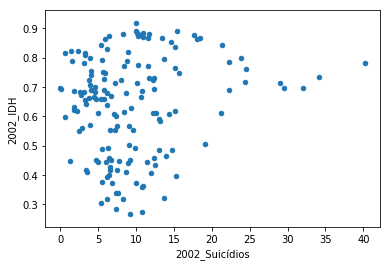

In [55]:
data.plot.scatter(x='2002_Suicídios', y='2002_IDH')

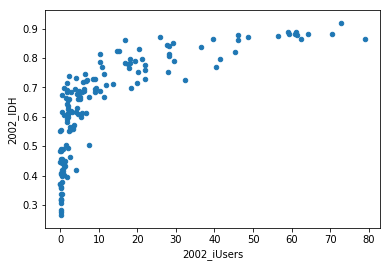

In [56]:
data.plot.scatter(x='2002_iUsers', y='2002_IDH')

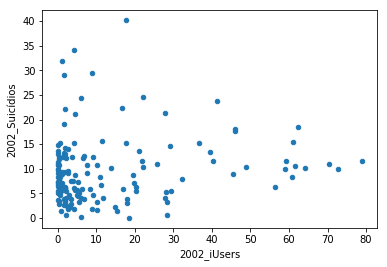

In [57]:
data.plot.scatter(y='2002_Suicídios', x='2002_iUsers')

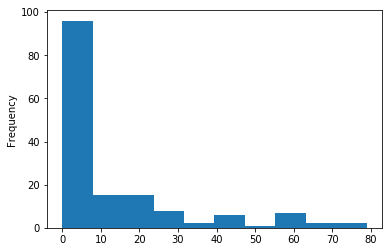

In [58]:
data["2002_iUsers"].plot.hist()

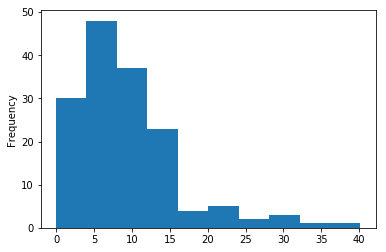

In [59]:
data["2002_Suicídios"].plot.hist()

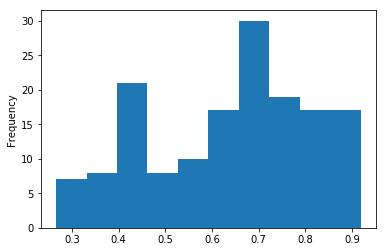

In [60]:
data["2002_IDH"].plot.hist()

In [61]:
data.corr()

,2002_IDH,2002_Suicídios,2002_iUsers
2002_IDH,1.000000,0.156669,0.723371
2002_Suicídios,0.156669,1.000000,0.158742
2002_iUsers,0.723371,0.158742,1.000000


In [62]:
def reta(dados_x, dados_y, EixoX, EixoY, Ano):    
    a = dados_y.cov(dados_x) / dados_x.var()
    b = dados_y.mean() - a*dados_x.mean()
 
    print('Ajuste linear entre X3 e X4:')
    print('Coeficiente linear:', b)
    print('Coeficiente angular:', a)
 
    fig = plt.figure(figsize=(8, 6))
    plt.scatter(dados_x, dados_y, c='red', alpha=0.8)
    plt.title(Ano)
    plt.xlabel(EixoX)
    plt.ylabel(EixoY)
 
    plt.plot((dados_x.min(), dados_x.max()), (a*dados_x.min()+b, a*dados_x.max()+b), color='blue')
 
    plt.tight_layout()
    plt.show()

Ajuste linear entre X3 e X4:
Coeficiente linear: 0.598533794633365
Coeficiente angular: 0.003932570676027378


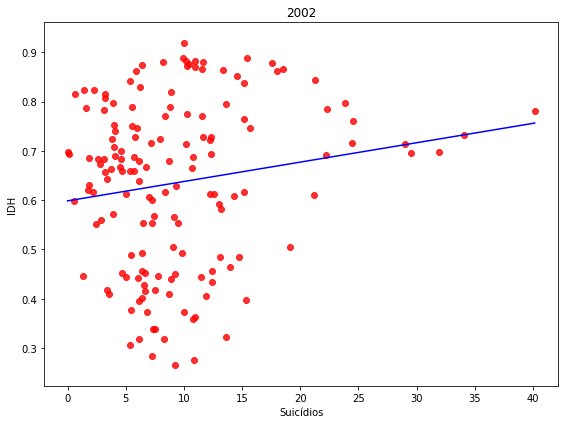

In [63]:
reta(data['2002_Suicídios'],data['2002_IDH'], 'Suicídios', 'IDH', '2002')

Ajuste linear entre X3 e X4:
Coeficiente linear: 0.5495539461646155
Coeficiente angular: 0.006706386368716619


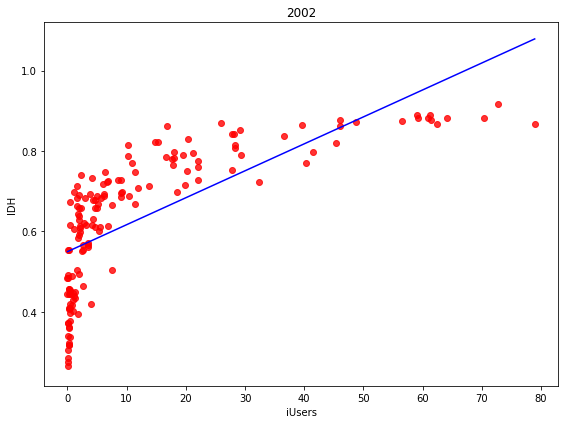

In [64]:

reta(data['2002_iUsers'],data['2002_IDH'], 'iUsers', 'IDH', '2002')



Ajuste linear entre X3 e X4:
Coeficiente linear: 8.680512283232009
Coeficiente angular: 0.058630864341005735


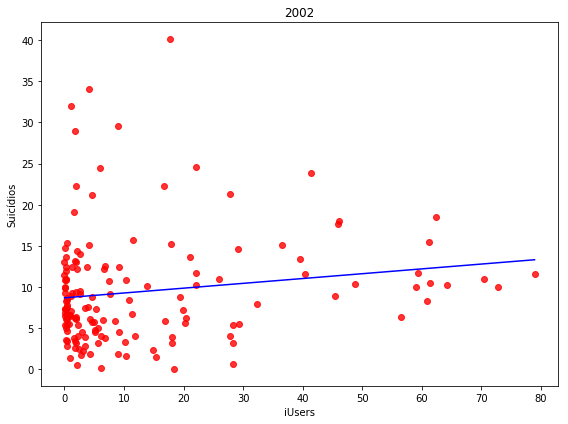

In [65]:
reta(data['2002_iUsers'],data['2002_Suicídios'], 'iUsers', 'Suicídios', '2002')

# PARA 2004

In [66]:
IDH_2004 = IDH.loc[:, ["geo", 2004]]
IDH_2004.head(3)

,geo,2004
0,Afghanistan,0.396
1,Albania,0.685
2,Algeria,0.680


In [67]:
Suic_2004 = Suic.loc[:, ["Suicide, age adjusted, per 100 000 standard population", 2004]]
Suic_2004.head(3)

,"Suicide, age adjusted, per 100 000 standard population",2004
0,Afghanistan,6.684385
1,Albania,7.699330
2,Algeria,4.848770


In [68]:
Internet2.head(3)

,Internet users (per 100 people),2004_iUsers
0,Abkhazia,NaN
1,Afghanistan,0.097164
2,Akrotiri and Dhekelia,NaN


In [69]:
IDH_idx = IDH_2004.set_index('geo')
Suic_idx = Suic_2004.set_index('Suicide, age adjusted, per 100 000 standard population')
Internet_idx = Internet2.set_index('Internet users (per 100 people)')

df = IDH_idx.join(Suic_idx, how='inner', lsuffix='_IDH', rsuffix='_Suicídios')

dats = df.join(Internet_idx, how="inner")
data2 = dats.dropna()
data2.head(10)

,2004_IDH,2004_Suicídios,2004_iUsers
Afghanistan,0.396,6.684385,0.097164
Albania,0.685,7.699330,2.420388
Algeria,0.680,4.848770,4.634475
Angola,0.426,14.554677,0.464815
Argentina,0.780,8.045732,16.036684
Armenia,0.679,3.741588,4.899009
Austria,0.848,13.644300,54.370248
Bahamas,0.786,3.374416,22.000000
Bahrain,0.806,4.414990,21.458681
Bangladesh,0.499,14.538357,0.199036


In [70]:
data2.to_csv( 'P1_IDH_2004.csv', index=True)

Ajuste linear entre X3 e X4:
Coeficiente linear: 0.54281703733216
Coeficiente angular: 0.005898398568027189


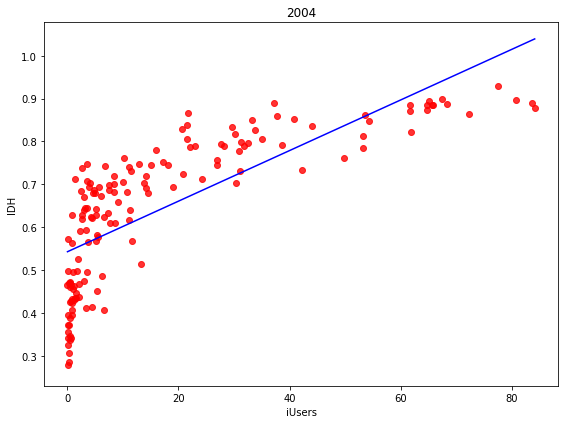

Ajuste linear entre X3 e X4:
Coeficiente linear: 0.632717604761215
Coeficiente angular: 0.0014233627201295728


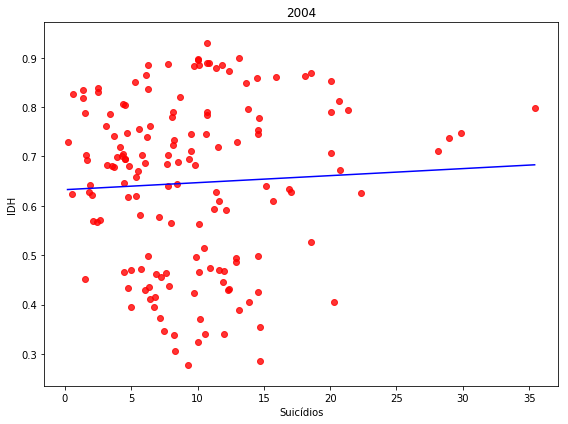

Ajuste linear entre X3 e X4:
Coeficiente linear: 8.871181195236018
Coeficiente angular: 0.03614891115960245


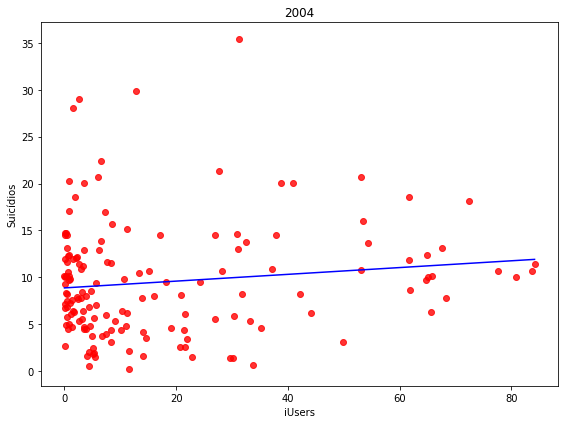

In [71]:
reta(data2['2004_iUsers'],data2['2004_IDH'], 'iUsers', 'IDH', '2004')
reta(data2['2004_Suicídios'],data2['2004_IDH'], 'Suicídios', 'IDH', '2004')
reta(data2['2004_iUsers'],data2['2004_Suicídios'], 'iUsers', 'Suicídios', '2004')

In [72]:
comp_IDH_idx = comp_IDH.set_index('geo').dropna()
comp_In_idx = comp_In.set_index('Internet users (per 100 people)').dropna()
comp_S_idx = comp_S.set_index('Suicide, age adjusted, per 100 000 standard population').dropna()

comp_IDH_idx.head(5)

,2002,2004
geo,,
Afghanistan,0.373,0.396
Albania,0.674,0.685
Algeria,0.663,0.680
Angola,0.406,0.426
Argentina,0.770,0.780


In [73]:
comp_In_idx.head(5)

,2002_iUsers,2004_iUsers
Internet users (per 100 people),,
Afghanistan,0.004092,0.097164
Albania,0.390081,2.420388
Algeria,1.591641,4.634475
Andorra,11.260469,26.837954
Angola,0.270377,0.464815


In [74]:
comp_S_idx.head(5)

,2002,2004
"Suicide, age adjusted, per 100 000 standard population",,
Afghanistan,6.867054,6.684385
Albania,2.792918,7.699330
Algeria,3.754641,4.848770
Andorra,5.460766,5.362179
Angola,11.941460,14.554677


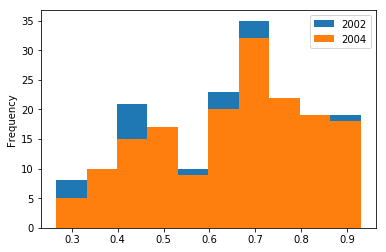

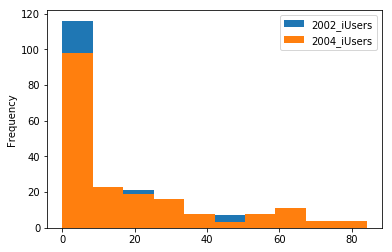

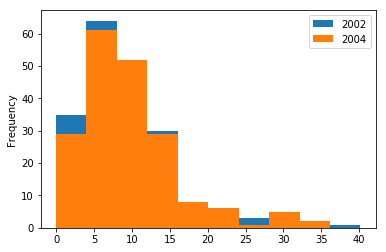

In [81]:
comp_IDH_idx.plot.hist()

comp_In_idx.plot.hist()

comp_S_idx.plot.hist()
